In [19]:
import soundfile as sf
import numpy
import matplotlib.pyplot as plt
import IPython.display as display
import soundfile as sf
import time
import os

# Read in Data

In [2]:
targetFile = "aegithina-viridissima-2"

In [3]:
data, sampleRate = sf.read("data/" + targetFile + ".wav")

In [4]:
data

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

# Visualization

In [5]:
display.Audio(data.T, rate=sampleRate)

/home/fishball/.local/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7580: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


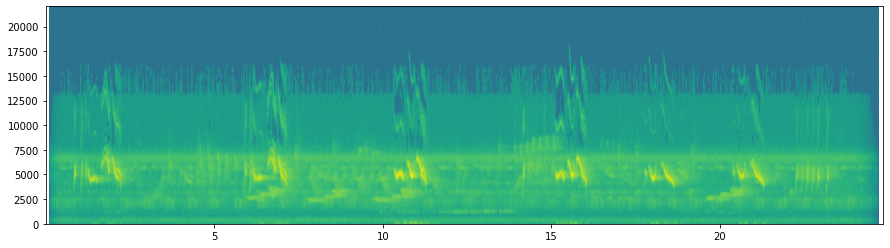

In [6]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
ax.specgram(data[:,0], Fs=sampleRate)
plt.show()

# Processing

In [7]:
# Get the intensity for each frame and get the abs value.
tmp = data[:,0]
tmp = [abs(i) for i in tmp]

In [8]:
# Get the overall intensity for each second.
intensity = [sum(tmp[i:i+sampleRate]) for i in range(0, len(tmp), sampleRate)]
intensity

[166.6678466796875,
 891.1637268066406,
 558.1592102050781,
 120.94793701171875,
 174.75958251953125,
 204.78451538085938,
 1818.1065063476562,
 650.3119506835938,
 295.1106872558594,
 200.71115112304688,
 3910.1642150878906,
 1416.0298767089844,
 124.67257690429688,
 122.81295776367188,
 267.36883544921875,
 2981.2044982910156,
 262.2145080566406,
 511.14013671875,
 1746.6558227539062,
 159.869140625,
 880.8224487304688,
 979.6710205078125,
 337.2434997558594,
 167.247802734375,
 25.90966796875]

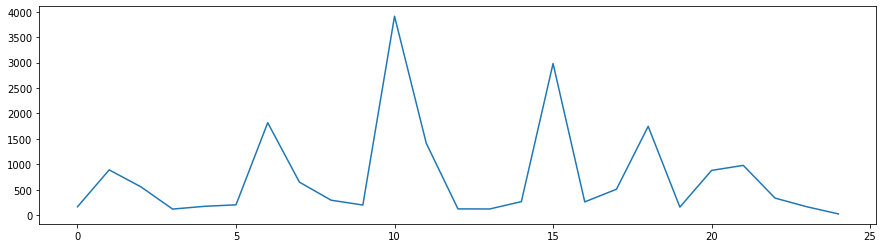

In [9]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
ax.plot(intensity)
plt.show()

In [10]:
# Get all seconds higher than threashold.
threashold = 500
res = []
for sec in range(0, len(intensity)):
    if intensity[sec] > threashold:
        res.append(sec)
res

[1, 2, 6, 7, 10, 11, 15, 17, 18, 20, 21]

In [11]:
# Get all consequtive seconds
clipCollection = []
workingSet = []
for i in res:
    if len(workingSet) == 0:
        workingSet.append(i)
        continue
    if i - workingSet[-1] == 1:
        workingSet.append(i)
        continue
    clipCollection.append(workingSet)
    workingSet = [i]

if len(workingSet) != 0:
    clipCollection.append(workingSet)

clipCollection

[[1, 2], [6, 7], [10, 11], [15], [17, 18], [20, 21]]

In [12]:
# Make collection range
tmp = []
for item in clipCollection:
    tmp.append([min(item), max(item)])
clipCollection = tmp
clipCollection

[[1, 2], [6, 7], [10, 11], [15, 15], [17, 18], [20, 21]]

In [13]:
# Set safe area
dirName = f"output/{targetFile}_{time.ctime().replace(":", "-").replace(" ", "_")}"
os.mkdir(dirName)
guard = int(1*sampleRate)
for i in range(len(clipCollection)):
    clip = data[sampleRate*clipCollection[i][0]-guard:sampleRate*clipCollection[i][1]+guard*2]
    sf.write(f'{dirName}/out_{clipCollection[i][0]}_{clipCollection[i][1]}.wav', clip, sampleRate, 'PCM_24')